In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('gold.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,281.0,281.0,281.0,282.7,4,USD
1,2000-01-05,283.2,283.2,283.2,281.1,16,USD
2,2000-01-06,281.4,281.4,281.4,281.4,0,USD
3,2000-01-07,281.9,281.9,281.9,281.9,0,USD
4,2000-01-10,281.7,281.7,281.7,281.7,0,USD


In [3]:
##checking the currency types in dataframe
df.Currency.value_counts()

USD    5718
Name: Currency, dtype: int64

In [4]:
#selecting the required column for analysis i.e. date and closing prices column
df1=df[['Date','Close']]
df1.head()

,Date,Close
0,2000-01-04,282.7
1,2000-01-05,281.1
2,2000-01-06,281.4
3,2000-01-07,281.9
4,2000-01-10,281.7


In [5]:
#checking the datatypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5718 entries, 0 to 5717
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5718 non-null   object 
 1   Close   5718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 89.5+ KB


In [6]:
#converting the datatype of 'Date column' from object to datatime
df1['Date']=pd.to_datetime(df1.Date)

<ipython-input-6-f322ac7cf168>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date']=pd.to_datetime(df1.Date)


In [7]:
#sorting by date
df1.sort_values('Date',inplace=True)

<ipython-input-7-2702dd889126>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values('Date',inplace=True)


In [8]:
#extracting the year from date column and creating the new column 'Year'
df1['Year']=df1.Date.dt.year


<ipython-input-8-167671252b2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year']=df1.Date.dt.year


In [9]:
df1.head()

,Date,Close,Year
0,2000-01-04,282.7,2000
1,2000-01-05,281.1,2000
2,2000-01-06,281.4,2000
3,2000-01-07,281.9,2000
4,2000-01-10,281.7,2000


In [10]:
#extracting the dataset between the year 2017 to 2019
x=df1.loc[(df1.Year==2017)|(df1.Year==2018)|(df1.Year==2019)]
x.head()

,Date,Close,Year
4304,2017-01-02,1151.05,2017
4305,2017-01-03,1282.70,2017
4306,2017-01-04,1285.10,2017
4307,2017-01-05,1300.10,2017
4308,2017-01-06,1293.70,2017


In [11]:
x.sort_values('Date')

,Date,Close,Year
4304,2017-01-02,1151.05,2017
4305,2017-01-03,1282.70,2017
4306,2017-01-04,1285.10,2017
4307,2017-01-05,1300.10,2017
4308,2017-01-06,1293.70,2017
...,...,...,...
5092,2019-12-25,1504.05,2019
5093,2019-12-26,1573.90,2019
5094,2019-12-27,1578.00,2019
5095,2019-12-30,1579.10,2019


In [12]:
#setting the index to 'Date' column  
x.set_index('Date',inplace=True)

In [13]:
#setting the frequency to monday 
x=x.asfreq(freq='W-MON')

In [14]:
x.isnull().sum()

Close    0
Year     0
dtype: int64

In [15]:
x.head()

,Close,Year
Date,,
2017-01-02,1151.05,2017
2017-01-09,1305.60,2017
2017-01-16,1202.85,2017
2017-01-23,1336.90,2017
2017-01-30,1314.40,2017


In [16]:
x.tail()

,Close,Year
Date,,
2019-12-02,1524.3,2019
2019-12-09,1522.4,2019
2019-12-16,1540.0,2019
2019-12-23,1548.0,2019
2019-12-30,1579.1,2019


In [18]:
x.shape

(157, 2)

[]

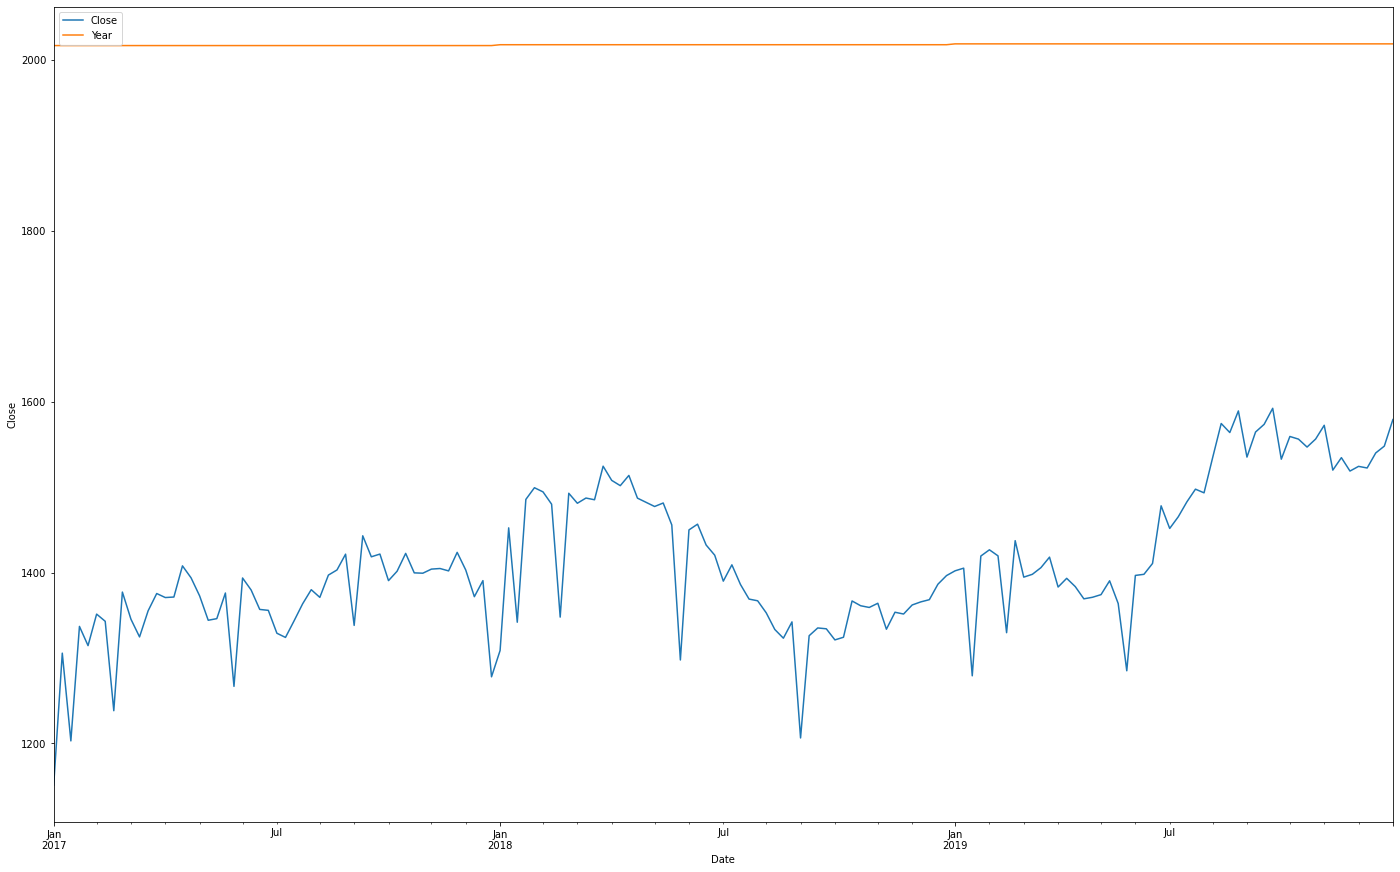

In [21]:
x.plot(legend=True,xlabel='Date',ylabel='Close',figsize=(24,15))
plt.plot()


C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Text(0.5, 1.0, 'actuals,predicted data points using holt winters exponentialsmoothing')

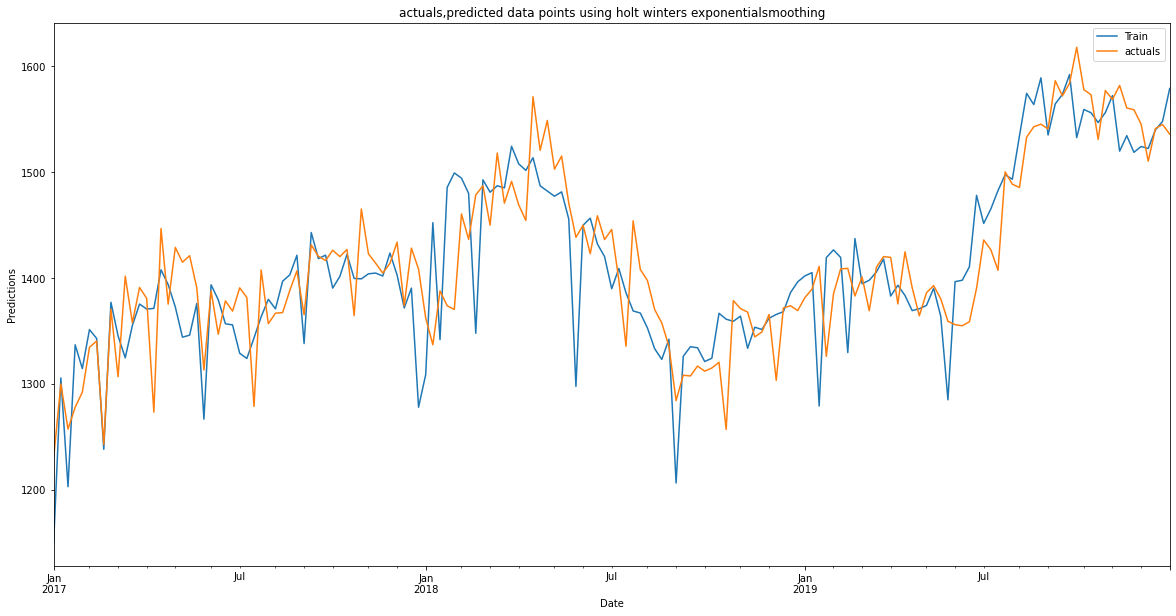

In [23]:
#now fitting the holt-winter model to the dataset and valiudating with the actuals closing prices 
fitted_model=ExponentialSmoothing(x.Close,trend='mul',seasonal='mul',seasonal_periods=7).fit()

test_predictions=fitted_model.predict(start='2017-01-02',end='2019-12-30')
x['Close'].plot(legend=True,label='Train',figsize=(20,10))
test_predictions.plot(label='actuals',legend=True,ylabel='Predictions')
plt.title('actuals,predicted data points using holt winters exponentialsmoothing')

In [25]:
#now calculating the mean absolute percentage error(MAPE) to check the efficiency of the model fitted 
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(x.Close,test_predictions)

0.025042377484807504

In [26]:
##since the MAPE comes out to very low i.e. .025% therefore fitted model gives the better results

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Text(0.5, 1.0, 'actuals,predicted data points using holt winters exponentialsmoothing')

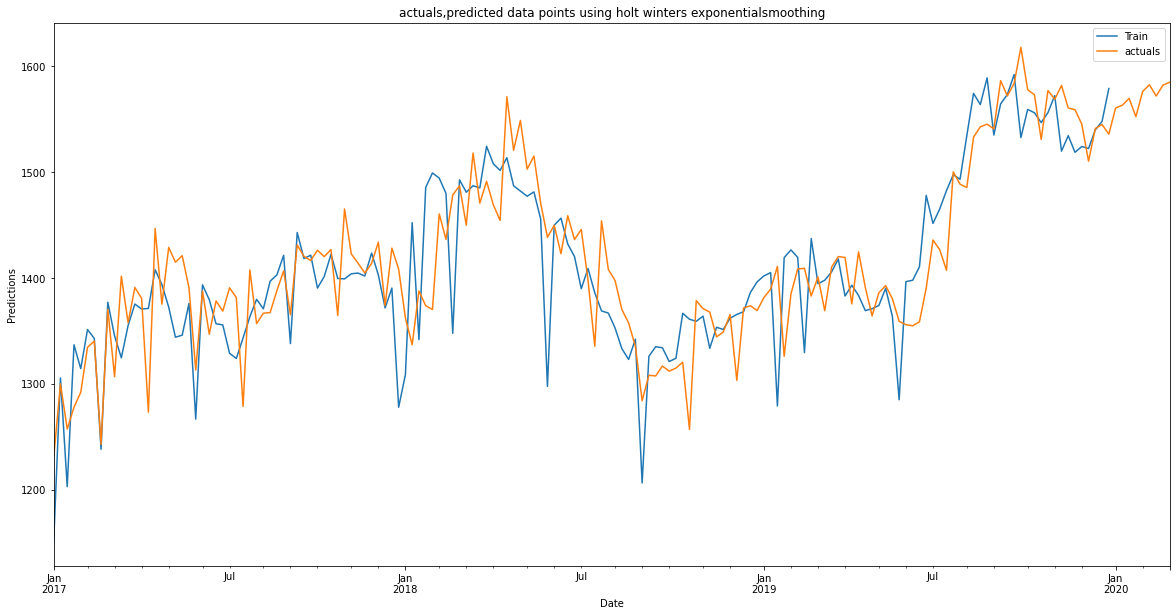

In [27]:
# now forecating the closing prices for next two months i.e.january and feburary
fitted_model=ExponentialSmoothing(x.Close,trend='mul',seasonal='mul',seasonal_periods=7).fit()

test_predictions=fitted_model.predict(start='2017-01-02',end='2020-02-28')
x['Close'].plot(legend=True,label='Train',figsize=(20,10))
test_predictions.plot(label='actuals',legend=True,ylabel='Predictions')
plt.title('actuals,predicted data points using holt winters exponentialsmoothing')